In [12]:
import itk
from matplotlib import pyplot as plt
import numpy as np
import pydicom
import cv2
import os
from matplotlib import pyplot, cm

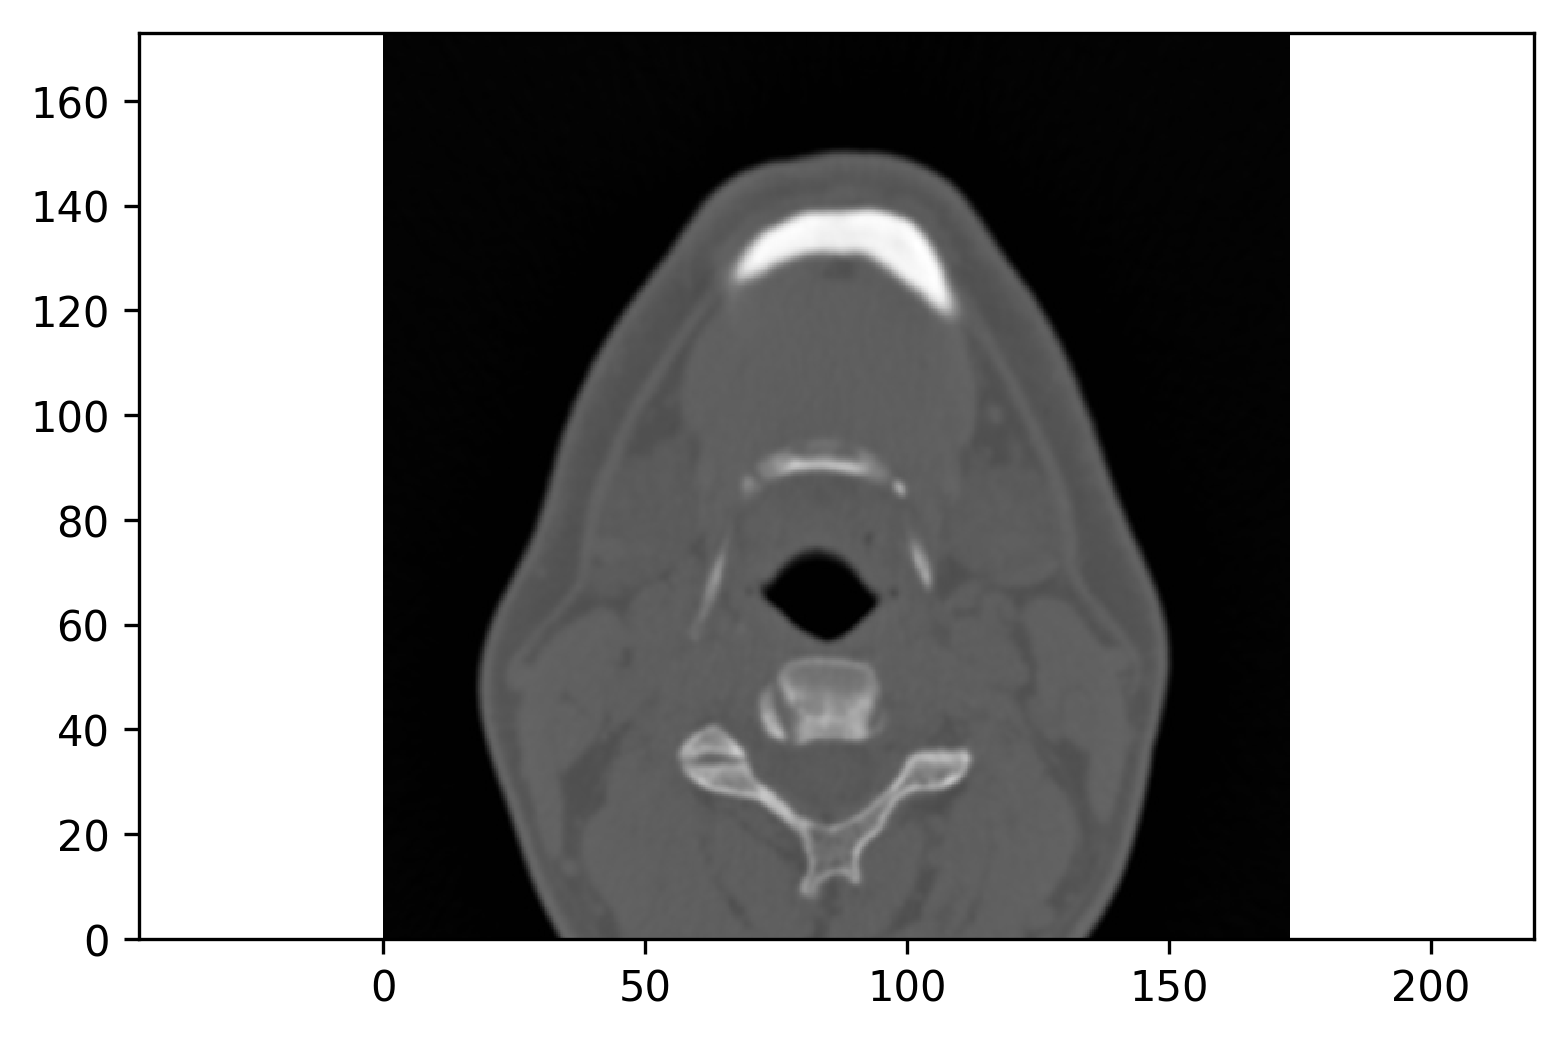

In [14]:
PathDicom = "/mnt/storage/Evidences/LEAL/series1/"
lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
# Get ref file
RefDs = pydicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
z = np.arange(0.0, (ConstPixelDims[2]+1)*ConstPixelSpacing[2], ConstPixelSpacing[2])


# The array is sized based on 'ConstPixelDims'
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = pydicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  
    
pyplot.figure(dpi=300)
pyplot.axes().set_aspect('equal', 'datalim')
pyplot.set_cmap(pyplot.gray())
pyplot.pcolormesh(x, y, np.flipud(ArrayDicom[:, :, 80]))

HERE WE HAVE A WHOLE SERIES OPEN!

In [28]:

def find_min_max_on_series(a_dicom_array):
    min_value = 99999
    max_value =-99999
    for each in ArrayDicom.flatten():
        if each < min_value:
            min_value = each
        if each > max_value:
            max_value = each
    return [min_value,max_value]


In [29]:
limits = find_min_max_on_series(ArrayDicom)
print(limits[0])
print(limits[1])

0
4095


In [46]:
windowed_series = ArrayDicom.copy()
min_max_range = limits[1] - limits[0]
for x in np.nditer(windowed_series, op_flags=['readwrite']):
    x[...] = 255*x/(min_max_range)
windowed_8bit_series = windowed_series.astype(np.uint8)

In [39]:
import math
def mark_label(image_index, col, lin, marker_image, label, radius):
    for y in range (col - radius, col + radius):
        for x in range(lin - radius, lin + radius):            
            sqx = col - x
            sqx = sqx * sqx
            sqy = lin - y
            sqy = sqy * sqy
            if math.sqrt(sqy+sqx) <= radius:
                marker_image[lin, col][image_index] = label



ADD SOME TESTING HERE


In [51]:
windowed_8bit_series[:,:,1]


array([[ 65,  65,  65, ...,  65,  65,  64],
       [ 65,  65,  65, ...,  65,  64,  64],
       [ 65,  65,  65, ...,  65,  64,  64],
       ...,
       [131, 131, 131, ..., 131, 131, 131],
       [133, 133, 133, ..., 131, 131, 131],
       [134, 134, 134, ..., 132, 132, 132]], dtype=uint8)

In [41]:
markers = windowed_series.astype(np.int32)
markers.fill(0)
mark_label(80,105,199,markers,1,6)
mark_label(80,115,419,markers,2,6)
mark_label(80,86,99  ,markers,2,6)
mark_label(90,305,199,markers,3,6)
mark_label(80,305,419,markers,4,6)


In [53]:
colored_data = cv2.cvtColor(windowed_8bit_series[:,:,1], cv2.COLOR_GRAY2BGR)

In [57]:
markers = cv2.

error: /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed
